# Quickstart


The easiest way to get started with using ``tweezepy`` is to use it for a project. Here's an annotated fully-functional example that demonstrates standard usage.

## Simulating a bead trajectory
Standard usage of ``tweezepy`` requires a 1D array of bead positions, $x$, and a sampling frequency, $f_s$.

To generate some example data, we will simulate a trajectory using ``tweezepy``'s built in bead position simulator.

To simulate the bead trajectory, we will need the bead's drag coefficient, $\gamma$, spring constant, $\kappa$, and the number of points to simulate, $N$. To mimic a real experiment, we will simulate the trace at a high frequency and downsample it to the appropriate sampling frequency. If you want to learn more about the simulation, check out the simulation tutorial.

In [3]:
import numpy as np
from tweezepy import downsampled_trace
fc = 10 # corner frequency
gamma = 1e-5 # dissipation due to viscous drag, in pN s/nm
             # 1e-5 is a typical value for an MT experiment
kappa = gamma*2*np.pi*fc # kappa in pN/nm
fsample = 400 # sampling frequency in Hz
N  = 102400 # number of points in trajectory
seed = 0 # random seed for reproducibility
time = np.arange(N)/fsample # time in s
xtrace = downsampled_trace(gamma,kappa,fsample,N, seed = seed)

Next, we will plot the bead positions and a histogram of the positions.

[]

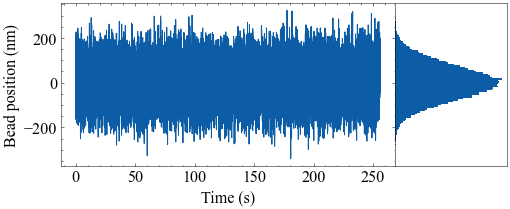

In [4]:
import matplotlib.pyplot as plt
plt.style.use('../tweezepy.mplstyle')
fig,ax = plt.subplots(figsize=(8,3),
                      ncols=2,
                      gridspec_kw={'width_ratios':[3,1],
                                   'wspace':0})
ax[0].plot(time, xtrace)
ax[1].hist(xtrace,bins=100,orientation = 'horizontal')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Bead position (nm)')
ax[1].set_xticks([])
ax[1].set_yticks([])


## Using the power spectral density (PSD) method
To use the power spectral density (PSD) method, simply import and use the `PSD` class.

### Estimating the PSD of a trajectory
To estimate the PSD of a trajectory, simply input the trajectory (in nm) and sampling frequency (in Hz) into the `PSD` class. The `PSD` class uses Welch's method to estimate the PSD. By default, it splits the data into three independent bins, calculates the PSD for each bin, and averages them together to reduce noise. The noise can be further reduced, at the cost of low frequency resolution, by changing the optional **bins** parameter.

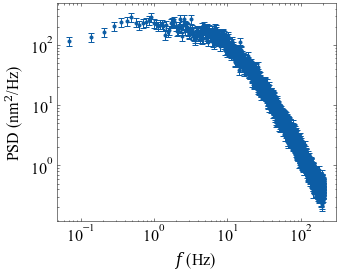

In [5]:
from tweezepy import PSD
psd = PSD(xtrace,fsample,bins=35)
fig, ax = psd.plot()

This figure shows the estimated PSD of the simulated bead trajectory.

### Fitting a model to the estimated PSD using maximum likelihood estimation (MLE)

To fit a model to the estimated PSD, simply call the PSD object and use the mlefit method. By default, it uses the Lansdorp PSD, which assumes zero dead-time and accounts for aliasing and motion blur.

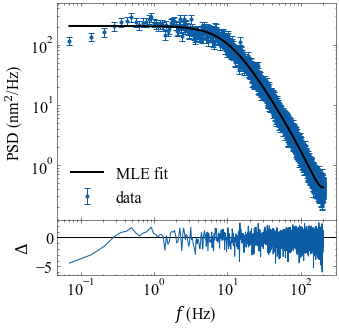

In [6]:
psd.mlefit()
fig,ax = psd.plot(data_label='data',fit_label = 'MLE fit')
ax[0].legend()

This figure shows the MLE fit to the PSD estimates. The parameters and their associated uncertainties can be accessed directly.

In [7]:
from IPython.display import display, Math
txt = r"$\gamma = %.1e\pm%.1e\textrm{ pNs/nm}$"%(psd.params[0],psd.std_errors[0])
display(Math(txt))
txt = r"$\kappa = %.1e\pm%.1e\textrm{ pN/nm}$"%(psd.params[1],psd.std_errors[1])
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## Using the Allan variance (AV) method
To use the Allan variance (AV) method, simply import and use the `AV` class.

### Estimating the AV of a trajectory
To estimate the AV of a trajectory, simply input the trajectory (in nm) and sampling frequency (in Hz) into the `PSD` class. By default, the `AV` class uses the overlapping AV, octave spaced samples, and calculates the type of noise and equivalent degrees of freedom. See docstrings for more information.

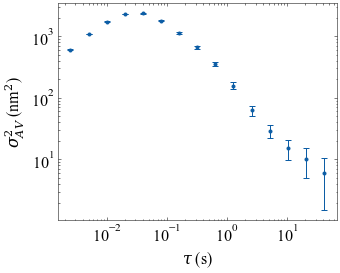

In [8]:
from tweezepy import AV
av = AV(xtrace,fsample)
fig, ax = av.plot()

### Fitting a model to the estimated AV using maximum likelihood estimation (MLE)
To fit a model to the estimated AV, simply call the AV object and use the mlefit method. By default, it uses the analytical function without tracking error. 

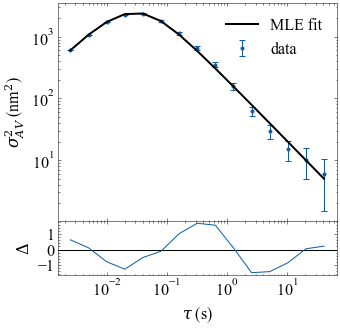

In [9]:
av.mlefit()
fig,ax = av.plot(data_label='data',fit_label = 'MLE fit')
ax[0].legend()

This figure shows the MLE fit to the AV estimates. The parameters and their associated uncertainties can be accessed directly.

In [10]:
txt = r"$\gamma = %.1e\pm%.1e\textrm{ pNs/nm}$"%(av.params[0],av.std_errors[0])
display(Math(txt))
txt = r"$\kappa = %.1e\pm%.1e\textrm{ pN/nm}$"%(av.params[1],av.std_errors[1])
display(Math(txt))

<IPython.core.display.Math object>

<IPython.core.display.Math object>